In [176]:
import pandas as pd
import numpy as np
import pickle
import csv
from sklearn.model_selection import train_test_split

df = pd.read_csv('data/records_4000.tsv', sep='\t', index_col = 1)
df['genre'] = df['genre'].str[:-1]
df=df.fillna(0)
df=df.replace([np.inf, -np.inf], np.nan).dropna(axis=1)
# Format of genre is "Rap\n" with the return character
def create_train_validation_test(df, genre):
    # 4000 songs from genre
    labels = list(set([label.strip() for label in y]))
    otherlabels=list(set(labels)-set([genre]))
     #df['genre'] = df['genre'].str[:].replace([genre], '1')
    #df['genre'] = df['genre'].str[:].replace(otherlabels, '0')
    df_poprock = df.loc[df['genre'] == genre]

    # 4000 songs from not genre
    df_non_poprock = df.loc[df['genre'] != genre].sample(n=4000)

    # Divide pop rock into train and test
    train_poprock, test_poprock = train_test_split(df_poprock, test_size=0.2)

    # Divide non pop rock into train and test
    train_non_poprock, test_non_poprock = train_test_split(df_non_poprock, test_size = 0.2)

    # Combine pop-rock and non-poprock into train/test
    train = train_poprock.append(train_non_poprock)
    test = test_poprock.append(test_non_poprock)

    train, validation = train_test_split(train, test_size=0.2)

    # training, validation, and test data

    X_train = train.drop(['genre'], axis = 1)
    y_train = train[['genre']].replace([genre], '1').replace(otherlabels, '-1')

    X_validation = validation.drop(['genre'], axis = 1)
    y_validation = validation[['genre']].replace([genre], '1').replace(otherlabels, '-1')

    X_test = test.drop(['genre'], axis = 1)
    y_test = test[['genre']].replace([genre], '1').replace(otherlabels, '-1')

    return X_train, y_train, X_validation, y_validation, X_test, y_test

In [177]:
y=df['genre']
labels = list(set([label.strip() for label in y]))
X_train, y_train, X_validation, y_validation, X_test, y_test=create_train_validation_test(df,'Rap')

In [178]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [324]:
regr = linear_model.LinearRegression()

x = pd.concat([X_train,X_test]) #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
min_max_scaler.fit(x)
X_train =min_max_scaler.transform(X_train)
X_test =min_max_scaler.transform(X_test)
regr.fit(X_train, y_train)
# Make predictions using the testing set
pred = regr.predict(X_test)

In [325]:
def match(label,pred):
    match=0
    for i in range(0,len(label)):
        if(label[i]*pred[i]>0):
            match+=1;
    return match*1.0/len(label)
    #print "accuracy: "+str(match*1.0/len(label))

In [326]:

y_test_list=[int(y[0]) for y in list(y_test.as_matrix())]
pred_list=[p[0] for p in pred]
match(y_test_list,pred_list)

0.679375

In [327]:
accus=[]
coefs=np.zeros((13,28))
count=0
for labelname in labels:
    y=df['genre']
    labels = list(set([label.strip() for label in y]))
    X_train, y_train, X_validation, y_validation, X_test, y_test=create_train_validation_test(df,labelname)
    regr = linear_model.LinearRegression()
    regr.fit(X_train, y_train)
    pred = regr.predict(X_test)
    y_test_list=[int(y[0]) for y in list(y_test.as_matrix())]
    pred_list=[p[0] for p in pred]
    accu=match(y_test_list,pred_list)
    #print("Mean squared error: %.2f"% mean_squared_error(y_test_list,pred_list))
    print "accuracy for "+labelname+": "+str(accu)
    accus+=[accu]
    coefs[count]=regr.coef_
    count+=1
print "Avergae Accuracy: "+str(sum(accus)*1.0/len(accus))

accuracy for Reggae: 0.801875
accuracy for Pop_Rock: 0.740625
accuracy for Country: 0.731875
accuracy for Jazz: 0.69625
accuracy for Vocal: 0.7575
accuracy for New Age: 0.77375
accuracy for Latin: 0.65625
accuracy for Rap: 0.784375
accuracy for RnB: 0.63875
accuracy for International: 0.5725
accuracy for Blues: 0.63125
accuracy for Electronic: 0.703125
accuracy for Folk: 0.66625
Avergae Accuracy: 0.704182692308


In [310]:
accus=[]
coefs=np.zeros((13,28))
count=0
for labelname in labels:
    y=df['genre']
    labels = list(set([label.strip() for label in y]))
    X_train, y_train, X_validation, y_validation, X_test, y_test=create_train_validation_test(df,labelname)
    regr = linear_model.HuberRegressor()
    regr.fit(X_train, y_train.values.flatten())
    pred = regr.predict(X_test)
    y_test_list=[int(y[0]) for y in list(y_test.as_matrix())]
    pred_list=list(pred)
    accu=match(y_test_list,pred_list)
    print "accuracy for "+labelname+": "+str(accu)
    accus+=[accu]
    coefs[count]=regr.coef_
    count+=1
print "Avergae Accuracy: "+str(sum(accus)*1.0/len(accus))

accuracy for Reggae: 0.781875
accuracy for Pop_Rock: 0.701875
accuracy for Country: 0.701875
accuracy for Jazz: 0.673125
accuracy for Vocal: 0.7125
accuracy for New Age: 0.773125
accuracy for Latin: 0.6425
accuracy for Rap: 0.766875
accuracy for RnB: 0.645
accuracy for International: 0.566875
accuracy for Blues: 0.593125
accuracy for Electronic: 0.68375
accuracy for Folk: 0.65875
Avergae Accuracy: 0.684711538462


In [204]:
from sklearn.decomposition import PCA


In [221]:
accus=[]
for labelname in labels:
    y=df['genre']
    labels = list(set([label.strip() for label in y]))
    X_train, y_train, X_validation, y_validation, X_test, y_test=create_train_validation_test(df,labelname)
    pca = PCA(n_components=10)
    pca.fit(pd.concat([X_train,X_test]))
    newX_train = pca.transform(X_train)
    newX_test = pca.transform(X_test)
    
    regr = linear_model.LinearRegression()
    regr.fit(newX_train, y_train)
    pred = regr.predict(newX_test)
    y_test_list=[int(y[0]) for y in list(y_test.as_matrix())]
    pred_list=[p[0] for p in pred]
    accu=match(y_test_list,pred_list)
    accus+=[accu]
    print "accuracy for "+labelname+": "+str(accu)
print "Avergae Accuracy: "+str(sum(accus)*1.0/len(accus))

accuracy for Reggae: 0.735
accuracy for Pop_Rock: 0.641875
accuracy for Country: 0.660625
accuracy for Jazz: 0.64875
accuracy for Vocal: 0.70125
accuracy for New Age: 0.725
accuracy for Latin: 0.6425
accuracy for Rap: 0.7275
accuracy for RnB: 0.594375
accuracy for International: 0.554375
accuracy for Blues: 0.565
accuracy for Electronic: 0.6575
accuracy for Folk: 0.64125
Avergae Accuracy: 0.653461538462


In [230]:
numpy.zeros

array([[  3.51310852e-04,   1.17641409e-02,   2.27108703e-01,
          7.99521519e-03,   9.14736797e-02,   3.41933050e-01,
          1.01169659e+00,   5.26338669e-03,  -3.85974865e-03,
         -5.12532389e-02,  -9.35131661e-03,   8.18391320e-03,
         -1.38996036e-01,  -2.23554996e-01,   2.72010018e-03,
         -1.11721978e-02,  -2.14284796e-01,  -3.98016241e-02,
          7.54676627e+00,  -6.82089034e+00,   6.26358547e-02,
         -3.18260123e-02,  -2.32523928e-02,   2.30875207e-02,
         -8.57922811e-01,   1.76932223e+00,   2.14968290e-01,
          1.01436481e-01]])

In [231]:
regr.coef_.shape

(1, 28)

In [238]:
coefs=np.zeros((13,28))

In [241]:
coefs

array([[  2.46680586e-03,   4.66439122e-03,   5.02542265e-02,
         -2.09334246e-02,  -1.31812037e-01,  -9.18913991e-02,
         -1.47577458e-01,   9.52352299e-03,  -1.31821106e-03,
          2.49212499e-02,  -1.03167228e-02,  -8.42444115e-04,
          1.28407615e-01,  -1.95177509e-01,   3.38145114e-03,
          6.66364086e-03,   2.54889633e-01,   1.31451551e-01,
          9.87301477e+00,  -3.67783341e+00,  -1.05140994e-01,
         -8.83271359e-02,   1.42104155e-02,   2.60074642e-02,
          1.01111989e+00,  -3.59623854e-01,  -1.06644851e-01,
          1.88151849e-01],
       [  1.33665208e-03,  -2.48116158e-03,  -2.12279539e-01,
          2.28659858e-03,  -1.60600581e-02,   2.19927119e-02,
          6.29045875e-02,  -3.38207960e-03,   4.70676857e-03,
         -2.62707122e-02,  -2.98032474e-03,   2.89563019e-03,
         -1.45608225e-01,   2.58983906e-01,  -2.06154372e-03,
         -4.32566120e-03,  -1.18212082e-01,  -3.66425547e-02,
         -5.37743441e+00,   2.69632775e+00,

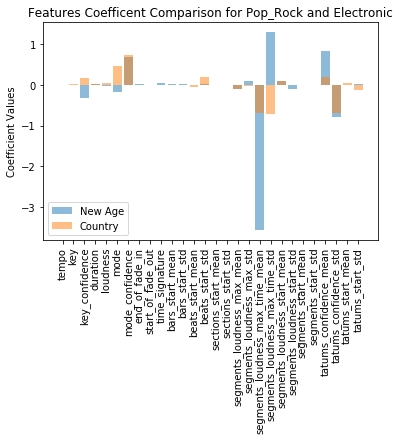

In [329]:
#objects = ('Reggae','Pop_Rock','Country','Jazz','Vocal','New Age','Latin','Rap','RnB','International','Blues','Electronic','Folk')
def plotcoef(coef,labelname):
    objects=list(df.columns.values)[1:]
    y_pos = np.arange(len(objects))
    performance = list(coef)

    plt.bar(y_pos, performance, align='center', alpha=0.5,label=labelname)
    plt.legend(loc='lower left')
    plt.xticks(y_pos, objects,rotation='vertical')
    plt.ylabel('Coefficient Values')
    
plt.title("Features Coefficent Comparison for "+labels[1]+" and "+labels[11])
plotcoef(coefs[5],labels[5])
plotcoef(coefs[2],labels[2])
plt.show()

In [275]:
list(coefs[5])

[0.0010822798417954723,
 -0.0031583077261973873,
 -0.28807841495570596,
 0.015410951394854211,
 -0.058132451189152654,
 -0.18445083122641939,
 0.67400291296051351,
 0.01938804204963205,
 -0.00839833194943276,
 0.00082237171830988175,
 0.0010988566905606742,
 -0.013380895730299077,
 -0.08344363092766735,
 0.16527858313802413,
 -0.0030583891457569489,
 -0.0062852925941378653,
 -0.10008079416993951,
 0.097346991196789801,
 -1.9643220515829762,
 0.65223016096513198,
 0.10765420983878379,
 -0.11628069250339348,
 0.002316713425601781,
 -0.011473718170137781,
 0.96601691790307709,
 -0.15072335730592407,
 0.064072453469129473,
 -0.12356187708225405]